### 📉 Loss Function in Deep Learning

A **loss function** is a method to evaluate how well your algorithm models your dataset. It calculates the error between the predicted and actual values.

> 🧠 **Why is the loss function important?**  
> *"You can't improve what you can't measure."*

---

### 🔢 Types of Loss Functions

#### 1. **Regression Loss Functions**
- **Mean Squared Error (MSE)**
  $$
  MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$
  - **Advantages:**
    - Easy to interpret
    - Differentiable (Gradient Descent friendly)
    - Smooth gradient (helps in convergence)
  - **Disadvantages:**
    - Error units are squared
    - Not robust to outliers
  
  > **Note:** If you're using MSE in deep learning, make sure your **output layer** uses a **Linear activation**.

- **Mean Absolute Error (MAE)**
  $$
  MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
  $$
  - **Advantages:**
    - Intuitive and easy to understand
    - Same unit as the target
    - Robust to outliers
  - **Disadvantages:**
    - Not differentiable at zero
    - Gradient descent is harder to apply directly (uses sub-gradients)

- **Huber Loss** (combines MSE and MAE — robust to outliers with smooth gradient)

---

#### 2. **Classification Loss Functions**
- **Binary Crossentropy**
- **Categorical Crossentropy**
- **Hinge Loss** (used in SVMs)

---

#### 3. **Autoencoders**
- **Kullback–Leibler (KL) Divergence**

---

#### 4. **GANs (Generative Adversarial Networks)**
- **Discriminator Loss**
- **Min-Max GAN Loss**

---

#### 5. **Embeddings**
- **Triplet Loss**

---

#### 6. **Object Detection**
- **Focal Loss** (used to handle class imbalance)

---


### 🧠 Loss Function vs Cost Function

**Loss Function**  
A loss function evaluates how well your model is performing **on a single training example** by calculating the error between the predicted and actual value.  
📌 Example: For prediction 8 and true value 9 → Loss = (8 - 9)²

**Cost Function**  
The cost function is the **average loss over the entire dataset or batch**. It is used during training to minimize overall model error.  
📌 So, Cost Function = Average of all Losses across samples.

---

### 🔢 Mean Squared Error (MSE)

$$
L = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

**Advantages**  
- ✅ Easy to interpret  
- ✅ Differentiable (Good for Gradient Descent)  
- ✅ Single global minimum

**Disadvantages**  
- ❌ Error unit is squared (difficult to relate to actual error scale)  
- ❌ Not robust to outliers

**🧠 Note (Deep Learning Context):**  
When using MSE, the activation function of the **final neuron** should be **linear**.

---

### 🔢 Mean Absolute Error (MAE)

$$
L = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$

**Advantages**  
- ✅ Intuitive and easy to understand  
- ✅ Output has same unit as target  
- ✅ Robust to outliers

**Disadvantages**  
- ❌ Not differentiable at zero  
- ❌ Gradient Descent becomes tricky (requires use of sub-gradients)  
- ❌ Increases computational complexity

---

### ⚖️ Huber Loss

$$
L_{\delta}(a) = 
\begin{cases} 
\frac{1}{2}(y - \hat{y})^2 & \text{for } |y - \hat{y}| \leq \delta \\
\delta \cdot (|y - \hat{y}| - \frac{1}{2}\delta) & \text{otherwise}
\end{cases}
$$

**📌 Hybrid of MAE and MSE.**  
Best used when data contains many **outliers**.

---

### 📊 Binary Cross Entropy

Used for **binary classification problems** (two classes only).

$$
L = -[y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]
$$

**Note:**  
- ✅ Output layer activation function must be **Sigmoid**
- ✅ Hidden layers can use **ReLU** or **Sigmoid**

**Advantages**  
- ✅ Differentiable  
- ✅ Well-suited for probability outputs

**Disadvantages**  
- ❌ Not very intuitive  
- ❌ May have multiple local minima

---

### 🧾 Categorical Cross Entropy

Used for **multi-class classification problems**.

$$
L = -\sum_{i=1}^{k} y_i \cdot \log(\hat{y}_i)
$$

Where:
- \( k \) = number of classes  
- \( y_i \) = actual label (1 for true class, 0 for others)  
- \( \hat{y}_i \) = predicted probability for class i

**Note:**  
- Output layer must have **as many neurons as number of classes**  
- Activation function = **Softmax**

---

### 🧠 Which Loss to Use?

| Type             | Case                          | Loss Function                |
|------------------|-------------------------------|------------------------------|
| Regression       | No outliers                   | Mean Squared Error (MSE)     |
| Regression       | Many outliers                 | Mean Absolute Error (MAE)    |
| Regression       | Balanced robustness           | Huber Loss                   |
| Classification   | Binary Classification         | Binary Cross Entropy         |
| Classification   | Multi-class (few classes)     | Categorical Cross Entropy    |
| Classification   | Multi-class (many categories) | Sparse Categorical Entropy   |


### 🔥 Focal Loss (Used in Object Detection)

Focal Loss is designed to **focus training on hard examples** and reduce the loss contribution from easy examples, especially useful when dealing with **imbalanced datasets** like in object detection (e.g., RetinaNet).

$$
FL(p_t) = -\alpha_t (1 - p_t)^\gamma \log(p_t)
$$

- \( p_t \): predicted probability of the true class
- \( \alpha_t \): weighting factor for class imbalance
- \( \gamma \): focusing parameter (typically 2)

**Advantages**
- ✅ Helps with class imbalance
- ✅ Focuses learning on hard examples

---

### 🧩 KL Divergence (Used in Autoencoders)

Kullback-Leibler Divergence measures how one probability distribution diverges from another (usually from a standard normal distribution in VAEs).

$$
D_{KL}(P || Q) = \sum P(x) \log \left( \frac{P(x)}{Q(x)} \right)
$$

**Use Case:**
- 🧠 Used in **Variational Autoencoders (VAEs)** to regularize the latent space
- Encourages latent variables to follow a normal distribution

**Note:**  
Often combined with reconstruction loss in VAEs:
$$
\text{Total Loss} = \text{Reconstruction Loss} + \beta \cdot D_{KL}
$$

---

### 🎭 GAN Losses (Generative Adversarial Networks)

GANs involve two neural networks: **Generator (G)** and **Discriminator (D)** trained in opposition.

#### (a) Discriminator Loss

$$
\mathcal{L}_D = -\mathbb{E}[\log D(x)] - \mathbb{E}[\log(1 - D(G(z)))]
$$

- First term for real data  
- Second term for generated (fake) data

#### (b) Generator Loss

$$
\mathcal{L}_G = -\mathbb{E}[\log D(G(z))]
$$

- The generator tries to fool the discriminator

**Alternate Loss (MinMax Formulation)**

$$
\min_G \max_D V(D, G) = \mathbb{E}_{x \sim p_{\text{data}}}[\log D(x)] + \mathbb{E}_{z \sim p(z)}[\log(1 - D(G(z)))]
$$

---

### 🧬 Triplet Loss (Used in Embedding/Face Recognition)

Used when learning **embedding spaces** such that similar inputs are close together and dissimilar ones are far apart.

A **triplet** consists of:
- **Anchor (A)**
- **Positive (P)** → same class as A  
- **Negative (N)** → different class from A

$$
\mathcal{L} = \max\left( ||f(A) - f(P)||_2^2 - ||f(A) - f(N)||_2^2 + \alpha, 0 \right)
$$

- \( \alpha \) = margin (hyperparameter)
- \( f(\cdot) \) = embedding function

**Goal:** Ensure Anchor is closer to Positive than to Negative by a margin.

---

### ✅ Summary: Loss Function by Use-Case

| Problem Area       | Loss Function               | Best For                                       |
|--------------------|-----------------------------|------------------------------------------------|
| Regression         | MSE / MAE / Huber           | Numerical prediction, robust (Huber)           |
| Binary Classification | Binary Cross Entropy     | 2-class problems                               |
| Multi-Class Classification | Categorical / Sparse Categorical CE | >2 class problems                    |
| Imbalanced Classification | Focal Loss           | Class imbalance (e.g., object detection)       |
| Autoencoders       | KL Divergence + Recon Loss  | Regularized encoding space                     |
| GANs               | Binary CE / MinMax          | Training discriminator and generator           |
| Embedding / Similarity | Triplet Loss           | Face recognition, similarity tasks             |


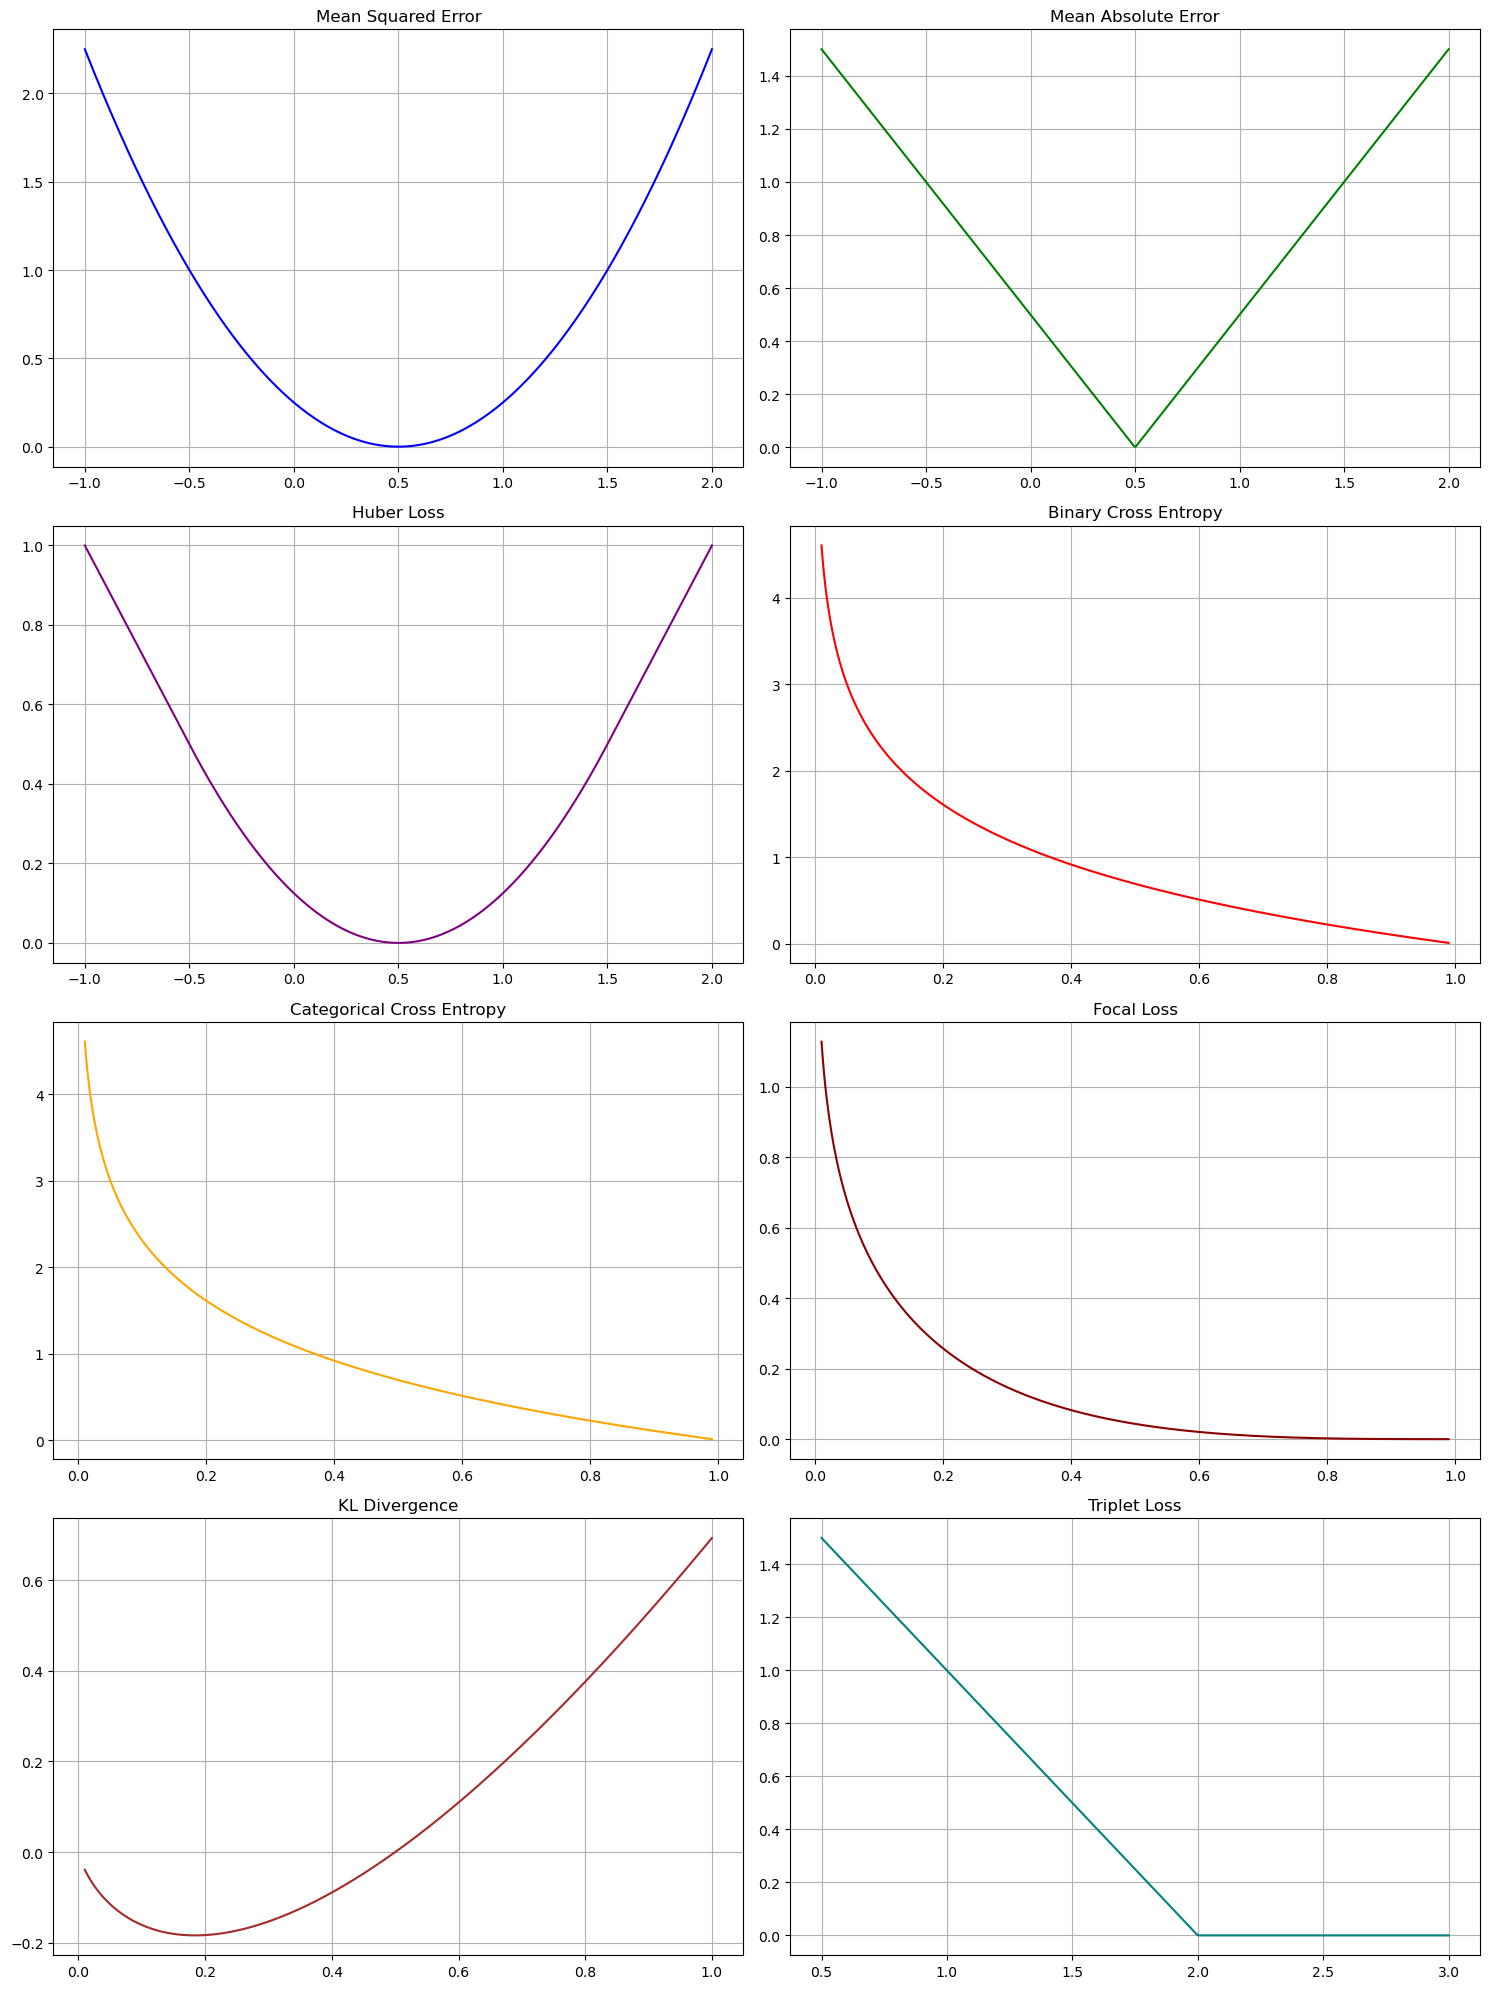

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of y_true and y_pred values for visualization
y_true = 0.5
y_pred = np.linspace(-1, 2, 500)
delta = 1.0  # For Huber loss

# Define loss functions
mse = (y_true - y_pred) ** 2
mae = np.abs(y_true - y_pred)
huber = np.where(np.abs(y_true - y_pred) <= delta,
                 0.5 * (y_true - y_pred) ** 2,
                 delta * (np.abs(y_true - y_pred)) - 0.5 * delta)

# Binary cross entropy (with predicted values between 0.01 and 0.99 to avoid log(0))
p = np.linspace(0.01, 0.99, 500)
y = 1
bce = - (y * np.log(p) + (1 - y) * np.log(1 - p))

# Categorical cross entropy (simplified for 2 class softmax case)
# p = softmax probability for the correct class
cce = -np.log(p)

# Focal Loss
gamma = 2
alpha = 0.25
focal = -alpha * (1 - p) ** gamma * np.log(p)

# KL Divergence between two distributions P and Q
P = np.linspace(0.01, 1.0, 500)
Q = 0.5 * np.ones_like(P)
kl_div = P * np.log(P / Q)

# Triplet Loss (simplified with a fixed distance of anchor-positive and variable negative)
d_ap = 1.0
d_an = np.linspace(0.5, 3.0, 500)
margin = 1.0
triplet_loss = np.maximum(d_ap - d_an + margin, 0)

# Plotting
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

axs[0, 0].plot(y_pred, mse, label="MSE", color="blue")
axs[0, 0].set_title("Mean Squared Error")
axs[0, 0].grid(True)

axs[0, 1].plot(y_pred, mae, label="MAE", color="green")
axs[0, 1].set_title("Mean Absolute Error")
axs[0, 1].grid(True)

axs[1, 0].plot(y_pred, huber, label="Huber Loss", color="purple")
axs[1, 0].set_title("Huber Loss")
axs[1, 0].grid(True)

axs[1, 1].plot(p, bce, label="Binary Cross Entropy", color="red")
axs[1, 1].set_title("Binary Cross Entropy")
axs[1, 1].grid(True)

axs[2, 0].plot(p, cce, label="Categorical Cross Entropy", color="orange")
axs[2, 0].set_title("Categorical Cross Entropy")
axs[2, 0].grid(True)

axs[2, 1].plot(p, focal, label="Focal Loss", color="darkred")
axs[2, 1].set_title("Focal Loss")
axs[2, 1].grid(True)

axs[3, 0].plot(P, kl_div, label="KL Divergence", color="brown")
axs[3, 0].set_title("KL Divergence")
axs[3, 0].grid(True)

axs[3, 1].plot(d_an, triplet_loss, label="Triplet Loss", color="teal")
axs[3, 1].set_title("Triplet Loss")
axs[3, 1].grid(True)

plt.tight_layout()
plt.show()



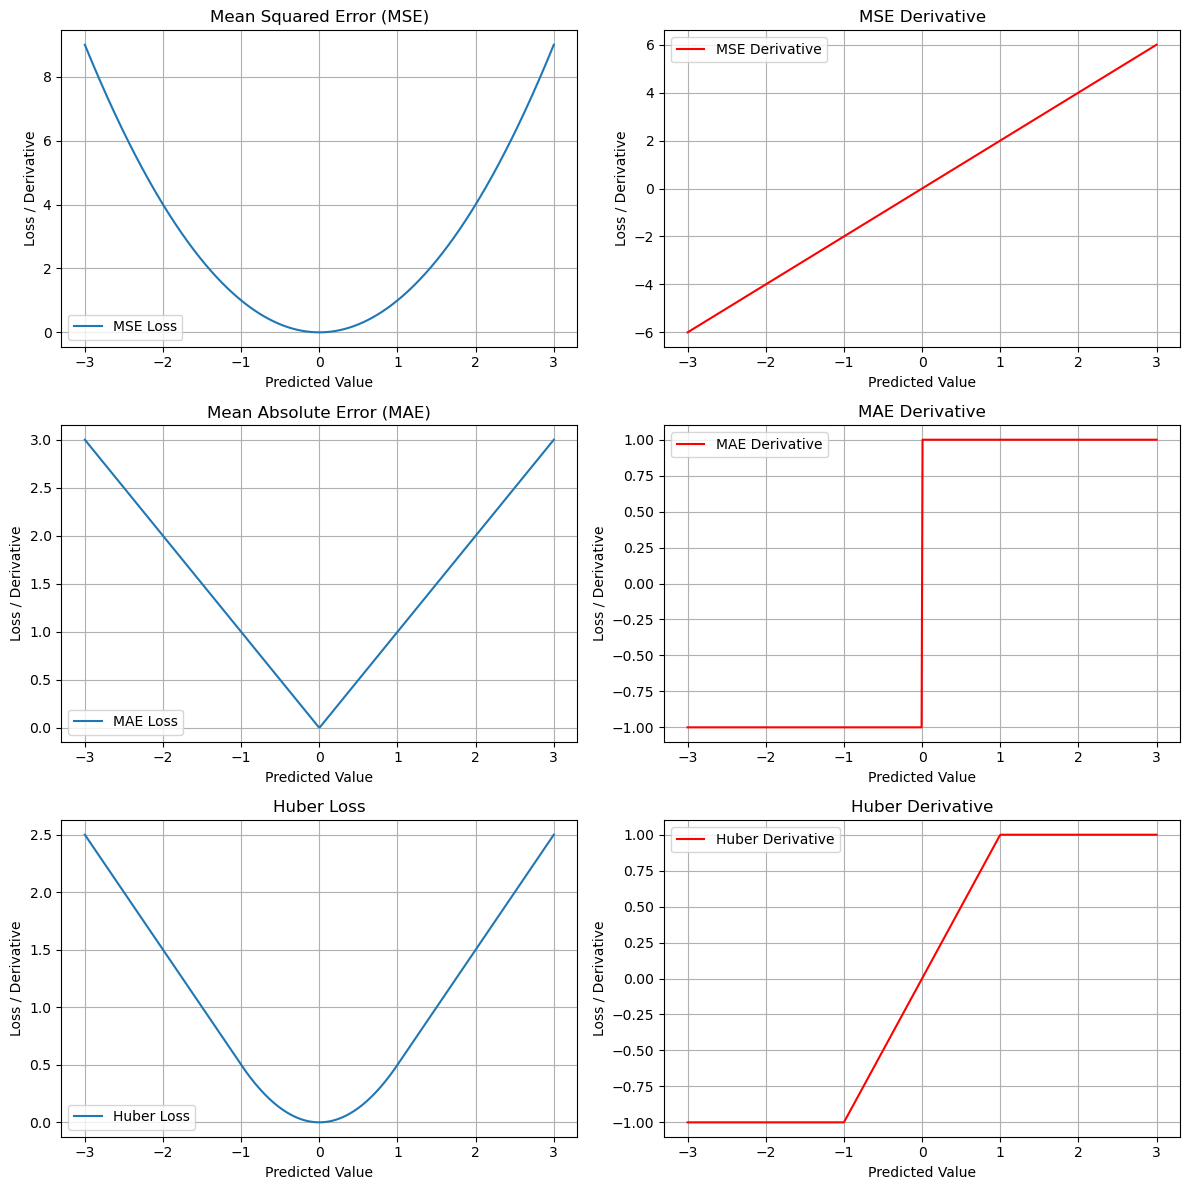

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define loss functions
def mse(y_true, y_pred):
    return (y_true - y_pred) ** 2

def mae(y_true, y_pred):
    return np.abs(y_true - y_pred)

def huber(y_true, y_pred, delta=1):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    return np.where(is_small_error,
                    0.5 * error ** 2,
                    delta * (np.abs(error) - 0.5 * delta))

# Derivatives
def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

def mae_derivative(y_true, y_pred):
    return np.where(y_pred > y_true, 1, -1)

def huber_derivative(y_true, y_pred, delta=1):
    error = y_pred - y_true
    return np.where(np.abs(error) <= delta, error, delta * np.sign(error))

# Generate sample data
y_true = 0
y_pred = np.linspace(-3, 3, 500)

# Compute loss and derivatives
mse_loss = mse(y_true, y_pred)
mae_loss = mae(y_true, y_pred)
huber_loss = huber(y_true, y_pred)

mse_grad = mse_derivative(y_true, y_pred)
mae_grad = mae_derivative(y_true, y_pred)
huber_grad = huber_derivative(y_true, y_pred)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

axs[0, 0].plot(y_pred, mse_loss, label='MSE Loss')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 1].plot(y_pred, mse_grad, label='MSE Derivative', color='red')
axs[0, 1].set_title('MSE Derivative')

axs[1, 0].plot(y_pred, mae_loss, label='MAE Loss')
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 1].plot(y_pred, mae_grad, label='MAE Derivative', color='red')
axs[1, 1].set_title('MAE Derivative')

axs[2, 0].plot(y_pred, huber_loss, label='Huber Loss')
axs[2, 0].set_title('Huber Loss')
axs[2, 1].plot(y_pred, huber_grad, label='Huber Derivative', color='red')
axs[2, 1].set_title('Huber Derivative')

# Styling
for ax in axs.flat:
    ax.legend()
    ax.grid(True)
    ax.set_xlabel("Predicted Value")
    ax.set_ylabel("Loss / Derivative")

plt.tight_layout()
plt.show()


### Key Insights from Loss Function Visualizations

- **Mean Squared Error (MSE):**  
  Has a smooth parabolic curve and a continuously differentiable gradient (linear in error). Suitable for regression when outliers are not a concern.

- **Mean Absolute Error (MAE):**  
  Displays a sharp “V” shape. It is **not differentiable at zero**, which makes gradient-based optimization tricky. In practice, **sub-gradients** are used.

- **Huber Loss:**  
  Combines the best of MSE and MAE — behaves like MSE for small errors and like MAE for large errors.  
  It is both **robust to outliers** and **differentiable**, making it a good choice when outliers are present in the data.


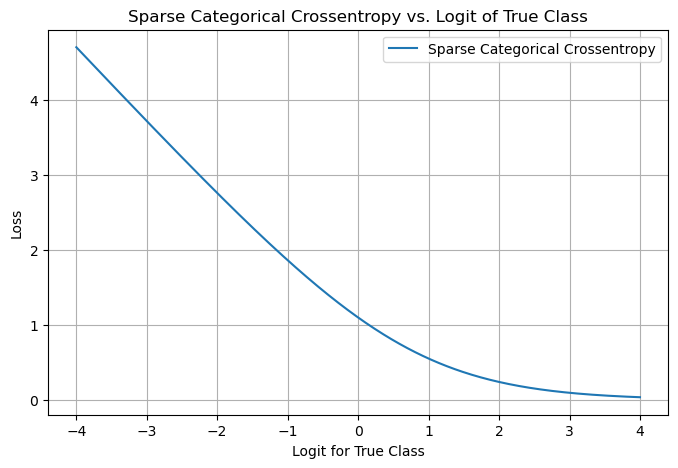

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sparse Categorical Crossentropy Loss (single label index)
def sparse_categorical_crossentropy(true_class_idx, logits):
    """
    true_class_idx: integer label
    logits: raw output scores (before softmax), shape (num_classes,)
    """
    exps = np.exp(logits - np.max(logits))  # for numerical stability
    probs = exps / np.sum(exps)
    return -np.log(probs[true_class_idx])

# Visualize loss for a range of predicted logits for a fixed true label
true_class = 1
logit_range = np.linspace(-4, 4, 500)
num_classes = 3

# Generate dummy logits: vary logit for the true class, keep others constant
logits = np.array([[0, l, 0] for l in logit_range])
losses = np.array([sparse_categorical_crossentropy(true_class, logit) for logit in logits])

# Plot
plt.figure(figsize=(8, 5))
plt.plot(logit_range, losses, label="Sparse Categorical Crossentropy")
plt.title("Sparse Categorical Crossentropy vs. Logit of True Class")
plt.xlabel("Logit for True Class")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


### What the Logit vs Loss Plot Shows:

- As the **logit for the correct class increases**, the **loss decreases**, indicating that the model is becoming more confident in its correct prediction.

- If the **logit for the correct class is low or negative**, the **loss remains high**, reflecting that the model is **uncertain or incorrect** in its prediction.

🔍 This behavior is key to how **Cross-Entropy Loss** encourages the model to assign higher probabilities to the correct class by penalizing incorrect or uncertain outputs.


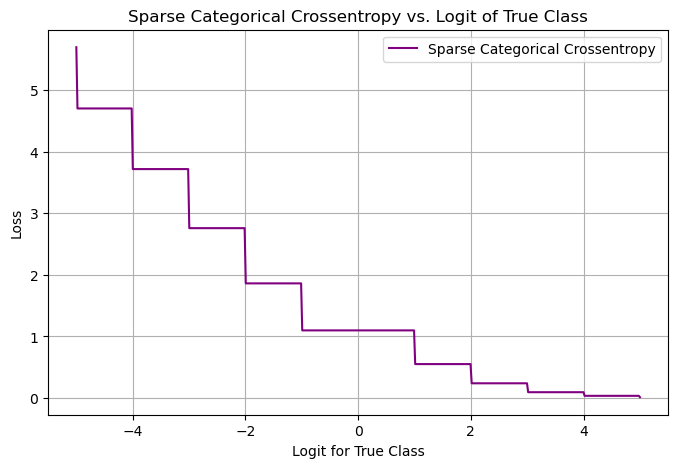

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sparse Categorical Crossentropy Loss (single label index)
def sparse_categorical_crossentropy(true_class_idx, logits):
    """
    true_class_idx: integer label
    logits: raw output scores (before softmax), shape (num_classes,)
    """
    exps = np.exp(logits - np.max(logits))  # for numerical stability
    probs = exps / np.sum(exps)
    return -np.log(probs[true_class_idx])

# Settings
true_class = 1
logit_range = np.linspace(-5, 5, 500)
num_classes = 3
fixed_other_logit = 0  # keep other class logits fixed at 0

# Create loss curve by varying the logit of the true class
losses = []
for logit_true_class in logit_range:
    logits = np.full(num_classes, fixed_other_logit)
    logits[true_class] = logit_true_class
    loss = sparse_categorical_crossentropy(true_class, logits)
    losses.append(loss)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(logit_range, losses, label="Sparse Categorical Crossentropy", color='purple')
plt.title("Sparse Categorical Crossentropy vs. Logit of True Class")
plt.xlabel("Logit for True Class")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


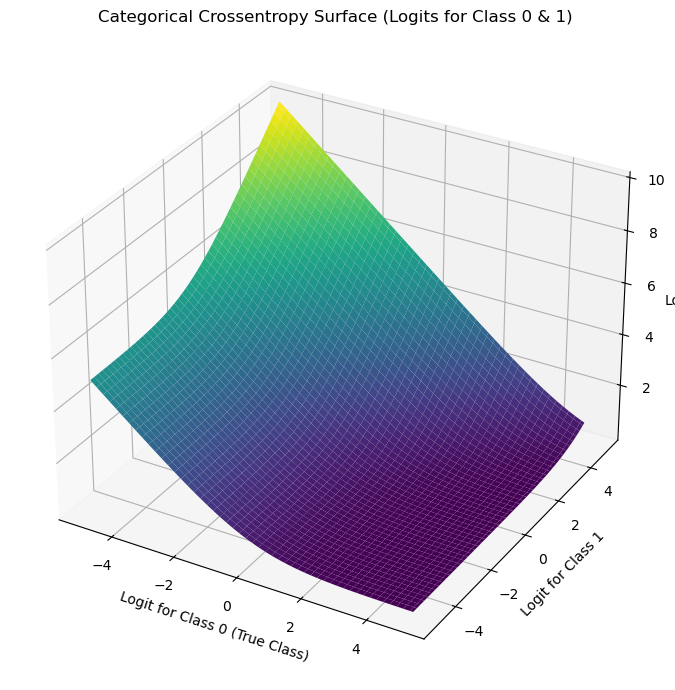

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Categorical Crossentropy Loss (vector of probabilities)
def categorical_crossentropy(y_true, logits):
    """
    y_true: one-hot vector
    logits: raw output scores (before softmax)
    """
    exps = np.exp(logits - np.max(logits))  # numerical stability
    probs = exps / np.sum(exps)
    return -np.sum(y_true * np.log(probs))

# Prepare 3D grid
logit1 = np.linspace(-5, 5, 100)
logit2 = np.linspace(-5, 5, 100)
Logit1, Logit2 = np.meshgrid(logit1, logit2)
Loss = np.zeros_like(Logit1)

# Assume 3 classes, vary logit[0] and logit[1], fix logit[2] = 0
y_true = np.array([1, 0, 0])  # True class is class 0

for i in range(Logit1.shape[0]):
    for j in range(Logit1.shape[1]):
        logits = np.array([Logit1[i, j], Logit2[i, j], 0])
        Loss[i, j] = categorical_crossentropy(y_true, logits)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Logit1, Logit2, Loss, cmap='viridis', edgecolor='none')
ax.set_title('Categorical Crossentropy Surface (Logits for Class 0 & 1)')
ax.set_xlabel('Logit for Class 0 (True Class)')
ax.set_ylabel('Logit for Class 1')
ax.set_zlabel('Loss')
plt.tight_layout()
plt.show()


### Key Insights from Loss Function Visualizations

- **Mean Squared Error (MSE)**  
  MSE has a **smooth parabolic curve** and a **continuously differentiable gradient** (linear in error).  
  🔹 Best when **no outliers** are present and smooth gradient updates are needed.

- **Mean Absolute Error (MAE)**  
  MAE has a **sharp “V” shape** and is **not differentiable at zero**, which is why we use **sub-gradients** in practice.  
  🔹 Preferred when **robustness to outliers** is important, but can make optimization tricky.

- **Huber Loss**  
  Huber Loss **transitions smoothly between MSE and MAE**, combining their advantages.  
  🔹 For **small errors**, it behaves like MSE (smooth and differentiable).  
  🔹 For **large errors**, it behaves like MAE (robust to outliers).  
  🔹 **Differentiable everywhere**, making it ideal when outliers are present but smooth updates are still desired.

These visual distinctions help understand why and when to use each loss function in regression problems.
